# Dataset

In [33]:
import os
import pandas as pd
import glob
import matplotlib.pyplot as plt
import cv2

In [5]:
dataset_path = r'D:\ArtGan\wikiart'
dir_list = os.listdir(dataset_path)
print('Files and directories in Argan Dataset: ', dir_list)

Files and directories in Argan Dataset:  ['Abstract_Expressionism', 'Action_painting', 'Analytical_Cubism', 'Art_Nouveau_Modern', 'Baroque', 'Color_Field_Painting', 'Contemporary_Realism', 'Expressionism', 'Fauvism', 'High_Renaissance', 'Impressionism', 'Mannerism_Late_Renaissance', 'Naive_Art_Primitivism', 'New_Realism', 'Northern_Renaissance', 'Pointillism', 'Pop_Art', 'Post_Impressionism', 'Realism', 'Symbolism', 'Synthetic_Cubism', 'Ukiyo_e']


## Creating a Dataframe of filepaths and labels

In [24]:
folders = sorted(os.listdir(dataset_path))
data = []

for folder in folders:
    style_dir = os.path.join(dataset_path, folder)
    if os.path.isdir(style_dir):
        for image in glob.glob(style_dir):
            image_files = [
                f for f in os.listdir(style_dir)
                if f.lower().endswith(('.jpg', '.png', '.jpeg'))
            ]            
            for img_file in image_files:
                img_path = os.path.join(style_dir, img_file)
                data.append([img_path, folder])
                
df = pd.DataFrame(data, columns=["filepath", "label"])
df.head()

,filepath,label
0,D:\ArtGan\wikiart\Abstract_Expressionism\aaron...,Abstract_Expressionism
1,D:\ArtGan\wikiart\Abstract_Expressionism\aaron...,Abstract_Expressionism
2,D:\ArtGan\wikiart\Abstract_Expressionism\aaron...,Abstract_Expressionism
3,D:\ArtGan\wikiart\Abstract_Expressionism\aaron...,Abstract_Expressionism
4,D:\ArtGan\wikiart\Abstract_Expressionism\aaron...,Abstract_Expressionism


In [26]:
df.shape

(81444, 2)

In [27]:
label_counts = df['label'].value_counts()
print(label_counts)

Impressionism                 13060
Realism                       10733
Romanticism                    7019
Expressionism                  6736
Post_Impressionism             6450
Symbolism                      4528
Art_Nouveau_Modern             4334
Baroque                        4240
Abstract_Expressionism         2782
Northern_Renaissance           2552
Naive_Art_Primitivism          2405
Cubism                         2235
Rococo                         2089
Color_Field_Painting           1615
Pop_Art                        1483
Early_Renaissance              1391
High_Renaissance               1343
Minimalism                     1337
Mannerism_Late_Renaissance     1279
Ukiyo_e                        1167
Fauvism                         934
Pointillism                     513
Contemporary_Realism            481
New_Realism                     314
Synthetic_Cubism                216
Analytical_Cubism               110
Action_painting                  98
Name: label, dtype: int64


<Axes: >

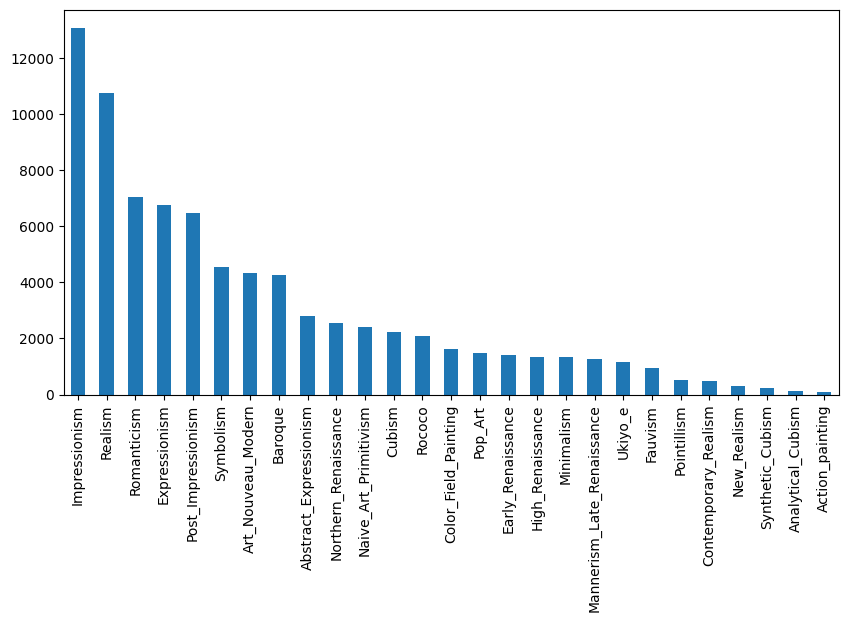

In [29]:
# PLotting in a bar chart
label_counts.plot(kind="bar", figsize=(10, 5))

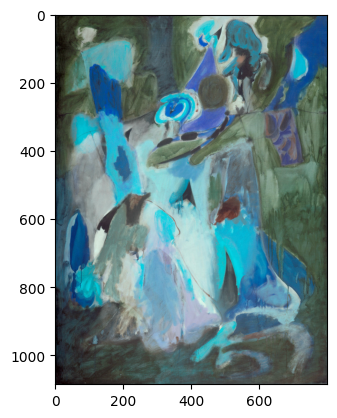

In [38]:
image_path = df['filepath'][100]
img = cv2.imread(image_path)
plt.imshow(img)